In [1]:
from pathlib import Path

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
sns.set_theme(context='notebook', style='whitegrid', palette='muted')

In [4]:
data_dir = Path('../../results')
train = pd.read_csv(data_dir / 'train_clean.csv')

In [5]:
num_cols = train.dtypes[(train.dtypes == 'float64') | (train.dtypes == 'int64')].index
num_cols

Index(['startYear', 'runtimeMinutes', 'numVotes', 'totalImages',
       'totalCredits', 'numRegions', 'companiesNumber', 'averageRating',
       'externalLinks', 'writerCredits', 'numGenres', 'criticReviewsRatio'],
      dtype='object')

In [6]:
scaler = RobustScaler()
train_X = scaler.fit_transform(train[num_cols])

## Principal component analysis

In [7]:
pca = PCA()
pca_train = pca.fit_transform(train_X)

In [8]:
explained_variance = pca.explained_variance_ratio_

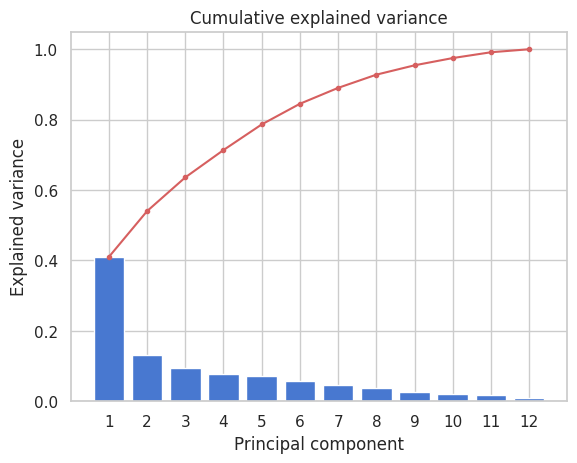

In [9]:
x = list(range(1, len(explained_variance) + 1))
plt.bar(x, height=explained_variance)
plt.xticks(x)
plt.plot(x, explained_variance.cumsum(), 'r.-')
plt.xlabel("Principal component")
plt.ylabel("Explained variance")
plt.title("Cumulative explained variance")
plt.show()

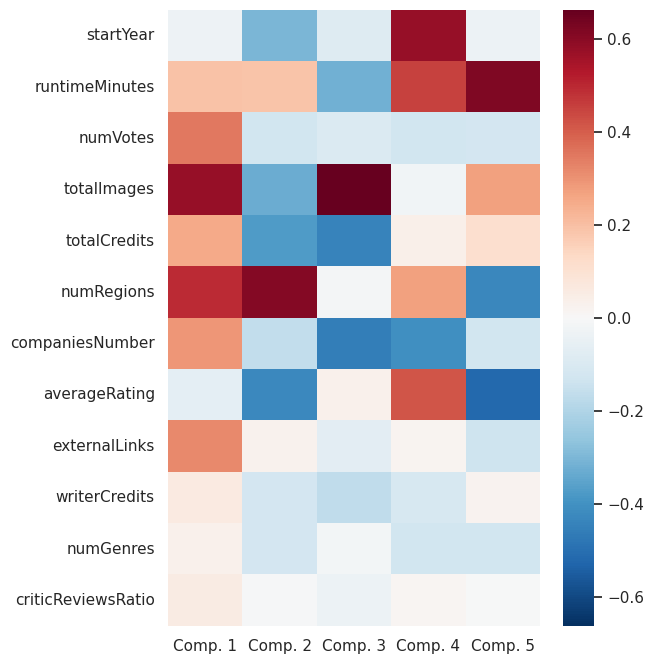

In [10]:
n_comp = 5

components = pca.components_[:n_comp].T
vmax = np.abs(components).max()

plt.figure(figsize=(1+n_comp, 8))
sns.heatmap(components, cmap='RdBu_r', vmax=vmax, vmin=-vmax)
plt.xticks(np.arange(n_comp) + .5, labels=[f'Comp. {i+1}' for i in range(n_comp)])
plt.yticks(ticks=np.arange(len(num_cols)) + .5, labels=num_cols, rotation=0)
plt.show()

In [11]:
with open(data_dir / 'pca.pkl', 'wb') as file:
    joblib.dump(pca, file, protocol=5)

## TSNE

In [18]:
%%time
tsne = TSNE(n_components=2)
tsne.fit(train_X)

CPU times: user 34min 22s, sys: 23.3 s, total: 34min 45s
Wall time: 9min 51s


,n_components,2
,perplexity,30.0
,early_exaggeration,12.0
,learning_rate,'auto'
,max_iter,1000
,n_iter_without_progress,300
,min_grad_norm,1e-07
,metric,'euclidean'
,metric_params,None
,init,'pca'
,verbose,0


In [19]:
with open(data_dir / 'tsne.pkl', 'wb') as file:
    joblib.dump(tsne, file, protocol=5)